**Import libraries**

In [1]:
import pandas as pd
import numpy as np
import io
import statsmodels.api as sm


**Upload the dataset**

In [2]:
from google.colab import files
raw_claims_data = files.upload()

Saving OBGYN_dataset.csv to OBGYN_dataset.csv


**Upload categories**

In [3]:
from google.colab import files
raw_claims_data2 = files.upload()

Saving OBGYN_categories_v1.csv to OBGYN_categories_v1.csv


**Import the datasets**

In [4]:
raw_data1 = pd.read_csv(io.BytesIO(raw_claims_data['OBGYN_dataset.csv']))
OBGYN_category_v1 = pd.read_csv(io.BytesIO(raw_claims_data2['OBGYN_categories_v1.csv']))


**Merge the two dataframes to categorize claims**

In [5]:
merged = pd.merge(raw_data1, OBGYN_category_v1, on="procedure_concept_id")

**Inspect the dataset**

In [6]:
merged

,person_id,procedure_date,procedure_concept_id,concept_name_x,amount,total_paid,provider_id,provider_name,concept_name_y,category according to domain expert
0,11248,8/3/2020,2004407,Amputation of cervix,1,839,45192,Baptist Health & Medical Center,Amputation of cervix,Procedure
1,11874,4/6/2020,2004407,Amputation of cervix,1,839,52356,Boudica Female Care,Amputation of cervix,Procedure
2,12745,12/20/2019,2004407,Amputation of cervix,1,839,24023,dr. Mariano & Co.,Amputation of cervix,Procedure
3,13133,7/29/2019,2004407,Amputation of cervix,1,839,24023,dr. Mariano & Co.,Amputation of cervix,Procedure
4,13844,8/31/2020,2004407,Amputation of cervix,1,839,45192,Baptist Health & Medical Center,Amputation of cervix,Procedure
...,...,...,...,...,...,...,...,...,...,...
52188,19298,9/26/2019,45890386,Abortion Procedures,1,1129,45192,Baptist Health & Medical Center,Abortion Procedures,Procedure
52189,19406,1/18/2020,45890386,Abortion Procedures,1,1129,45192,Baptist Health & Medical Center,Abortion Procedures,Procedure
52190,19435,8/26/2020,45890386,Abortion Procedures,1,1129,4823,East Westfield Health Services,Abortion Procedures,Procedure
52191,19656,4/30/2020,45890386,Abortion Procedures,1,1129,45192,Baptist Health & Medical Center,Abortion Procedures,Procedure


**Create a pivot table**

In [8]:
pivot = pd.pivot_table(merged, values = 'amount', index=['person_id'], columns = 'category according to domain expert',aggfunc=np.sum).reset_index()

In [46]:
#pivot = pd.pivot_table(merged, values = 'amount', index=['person_id'], columns = 'category according to process mining',aggfunc=np.sum).reset_index()

**Inspect the pivot table**

In [9]:
pivot

category according to domain expert,person_id,Consultation,Delivery,Diagnostic,Procedure
0,10429,4.0,NaN,3.0,NaN
1,10430,12.0,1.0,6.0,NaN
2,10431,10.0,1.0,6.0,NaN
3,10432,6.0,NaN,6.0,NaN
4,10433,1.0,NaN,NaN,NaN
...,...,...,...,...,...
9258,19688,2.0,1.0,8.0,NaN
9259,19689,2.0,NaN,2.0,NaN
9260,19690,12.0,1.0,6.0,NaN
9261,19691,1.0,NaN,NaN,NaN


**Replace NaN with zero**

In [10]:
raw_data = pivot.fillna(0)

**Inspect the new dataset**

In [11]:
raw_data

category according to domain expert,person_id,Consultation,Delivery,Diagnostic,Procedure
0,10429,4.0,0.0,3.0,0.0
1,10430,12.0,1.0,6.0,0.0
2,10431,10.0,1.0,6.0,0.0
3,10432,6.0,0.0,6.0,0.0
4,10433,1.0,0.0,0.0,0.0
...,...,...,...,...,...
9258,19688,2.0,1.0,8.0,0.0
9259,19689,2.0,0.0,2.0,0.0
9260,19690,12.0,1.0,6.0,0.0
9261,19691,1.0,0.0,0.0,0.0


**Removing the column person_id**

In [12]:
dataset = raw_data.iloc[:,1:]

**Inspect the new dataset**

In [51]:
dataset

category according to process mining,Consultation,Delivery,Gynaecology,Obstetrics
0,4.0,0.0,3.0,0.0
1,10.0,1.0,0.0,8.0
2,9.0,1.0,0.0,7.0
3,6.0,0.0,0.0,6.0
4,1.0,0.0,0.0,0.0
...,...,...,...,...
9258,0.0,1.0,0.0,10.0
9259,2.0,0.0,2.0,0.0
9260,10.0,1.0,0.0,8.0
9261,1.0,0.0,0.0,0.0


**Scale the dataset**

In [13]:
from sklearn import preprocessing
data_scaled = preprocessing.scale(dataset)

**Inspect the dataset**

In [14]:
data_scaled

array([[ 0.17577567, -0.37524799,  0.4204574 , -0.36263685],
       [ 2.70896904,  2.61350704,  1.55848123, -0.36263685],
       [ 2.07567069,  2.61350704,  1.55848123, -0.36263685],
       ...,
       [ 2.70896904,  2.61350704,  1.55848123, -0.36263685],
       [-0.77417184, -0.37524799, -0.71756643, -0.36263685],
       [-0.77417184, -0.37524799, -0.71756643, -0.36263685]])

**Apply PCA on scaled dataset**

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(data_scaled)


**Create a dataframe of containing the two principal components**

In [16]:
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
principalDf

,principal component 1,principal component 2
0,0.138129,-0.263159
1,3.936980,-0.385701
2,3.576126,-0.495245
3,1.184564,-0.179541
4,-1.088733,-0.401549
...,...,...
9258,2.589764,-0.950709
9259,-0.451252,-0.364061
9260,3.936980,-0.385701
9261,-1.088733,-0.401549


**Evaluate the variance that is explained by PCA in our dataset**

In [17]:
pca.explained_variance_ratio_

array([0.53453716, 0.25866045])

**Visualize the dataset along the two principal components in a scatterplot**

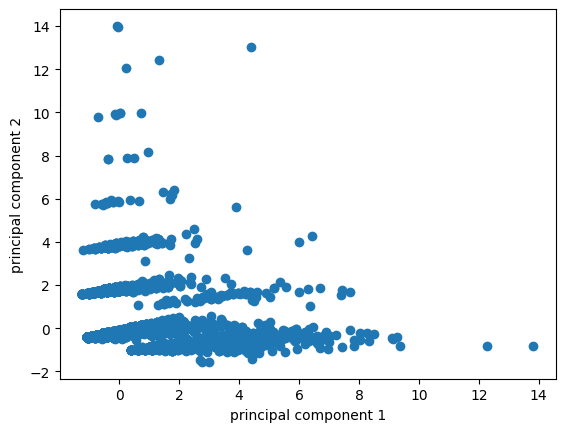

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
#If you are not using Google Colab, this line is not needed.
plt.scatter(principalComponents[:,0],principalComponents[:,1])
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')
plt.show()

**Create an elbow plot**

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

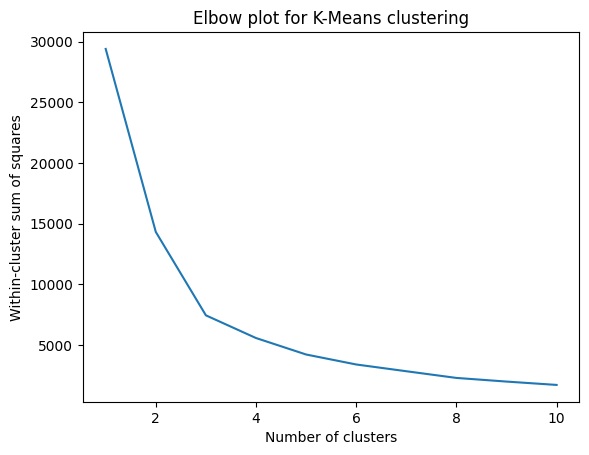

In [21]:
from sklearn.cluster import KMeans

# Calculate within-cluster sum of squares for each cluster
wss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(principalComponents)
    wss.append(kmeans.inertia_)

# Plot elbow graph
plt.plot(range(1, 11), wss)
plt.xlabel('Number of clusters')
plt.ylabel('Within-cluster sum of squares')
plt.title('Elbow plot for K-Means clustering')
plt.show()

**Combine PCA with K-means clustering**

In [22]:
from sklearn.cluster import KMeans
kmeans = KMeans(3)
kmeans.fit(principalComponents)
clusters_new = principalDf.copy()
clusters_new['cluster_pred'] = kmeans.fit_predict(principalComponents)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


**Visualize PCA & K-Means**

Text(0, 0.5, 'principal component 2')

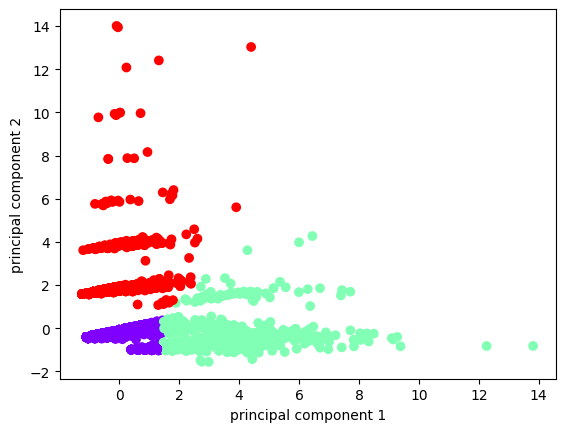

In [23]:
plt.scatter(clusters_new['principal component 1'],clusters_new['principal component 2'], c=clusters_new['cluster_pred']
,cmap='rainbow')
plt.xlabel('principal component 1')
plt.ylabel('principal component 2')

**Link the results from K-means clustering back to the original dataset**

In [24]:
identified_clusters = kmeans.fit_predict(data_scaled)
data_with_clusters = raw_data.copy()
data_with_clusters['Cluster'] = identified_clusters
data_with_clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


category according to domain expert,person_id,Consultation,Delivery,Diagnostic,Procedure,Cluster
0,10429,4.0,0.0,3.0,0.0,0
1,10430,12.0,1.0,6.0,0.0,2
2,10431,10.0,1.0,6.0,0.0,2
3,10432,6.0,0.0,6.0,0.0,0
4,10433,1.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...
9258,19688,2.0,1.0,8.0,0.0,2
9259,19689,2.0,0.0,2.0,0.0,0
9260,19690,12.0,1.0,6.0,0.0,2
9261,19691,1.0,0.0,0.0,0.0,0


**Add the metric 'Distance from closest centroid' obtained from k-means clustering**

In [25]:
X_dist = kmeans.transform(data_scaled)**2
alldistances = kmeans.fit_transform(data_scaled)
totalDistance = np.min(alldistances, axis=1).round(2)
data_with_distance = data_with_clusters.copy()
data_with_distance['Distance_from_nearest_cluster'] = totalDistance
data_with_distance

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


category according to domain expert,person_id,Consultation,Delivery,Diagnostic,Procedure,Cluster,Distance_from_nearest_cluster
0,10429,4.0,0.0,3.0,0.0,0,0.85
1,10430,12.0,1.0,6.0,0.0,2,1.22
2,10431,10.0,1.0,6.0,0.0,2,0.64
3,10432,6.0,0.0,6.0,0.0,0,2.15
4,10433,1.0,0.0,0.0,0.0,0,0.65
...,...,...,...,...,...,...,...
9258,19688,2.0,1.0,8.0,0.0,2,2.09
9259,19689,2.0,0.0,2.0,0.0,0,0.37
9260,19690,12.0,1.0,6.0,0.0,2,1.22
9261,19691,1.0,0.0,0.0,0.0,0,0.65


**Merge PCA metrics and k-means clustering metrics with the original dataset**

In [26]:
PCA_kmeans = pd.concat([data_with_distance, principalDf], axis=1)
PCA_kmeans

,person_id,Consultation,Delivery,Diagnostic,Procedure,Cluster,Distance_from_nearest_cluster,principal component 1,principal component 2
0,10429,4.0,0.0,3.0,0.0,0,0.85,0.138129,-0.263159
1,10430,12.0,1.0,6.0,0.0,2,1.22,3.936980,-0.385701
2,10431,10.0,1.0,6.0,0.0,2,0.64,3.576126,-0.495245
3,10432,6.0,0.0,6.0,0.0,0,2.15,1.184564,-0.179541
4,10433,1.0,0.0,0.0,0.0,0,0.65,-1.088733,-0.401549
...,...,...,...,...,...,...,...,...,...
9258,19688,2.0,1.0,8.0,0.0,2,2.09,2.589764,-0.950709
9259,19689,2.0,0.0,2.0,0.0,0,0.37,-0.451252,-0.364061
9260,19690,12.0,1.0,6.0,0.0,2,1.22,3.936980,-0.385701
9261,19691,1.0,0.0,0.0,0.0,0,0.65,-1.088733,-0.401549


In [27]:
PCA_kmeans.columns

Index(['person_id', 'Consultation', 'Delivery', 'Diagnostic', 'Procedure',
       'Cluster', 'Distance_from_nearest_cluster', 'principal component 1',
       'principal component 2'],
      dtype='object')

**Extract the relevant columns**

In [28]:
metrics_extracted = PCA_kmeans[['person_id','Cluster', 'Distance_from_nearest_cluster', 'principal component 1',
       'principal component 2' ]]
metrics_extracted

,person_id,Cluster,Distance_from_nearest_cluster,principal component 1,principal component 2
0,10429,0,0.85,0.138129,-0.263159
1,10430,2,1.22,3.936980,-0.385701
2,10431,2,0.64,3.576126,-0.495245
3,10432,0,2.15,1.184564,-0.179541
4,10433,0,0.65,-1.088733,-0.401549
...,...,...,...,...,...
9258,19688,2,2.09,2.589764,-0.950709
9259,19689,0,0.37,-0.451252,-0.364061
9260,19690,2,1.22,3.936980,-0.385701
9261,19691,0,0.65,-1.088733,-0.401549


**Merge the extracted metrics with the original claims dataset**

In [29]:
Final_data = pd.merge(merged, metrics_extracted, on= 'person_id')
Final_data

,person_id,procedure_date,procedure_concept_id,concept_name_x,amount,total_paid,provider_id,provider_name,concept_name_y,category according to domain expert,Cluster,Distance_from_nearest_cluster,principal component 1,principal component 2
0,11248,8/3/2020,2004407,Amputation of cervix,1,839,45192,Baptist Health & Medical Center,Amputation of cervix,Procedure,1,0.92,-0.875444,1.688589
1,11248,7/26/2020,40379574,Follow-up consultation,1,234,45192,Baptist Health & Medical Center,Follow-up consultation,Consultation,1,0.92,-0.875444,1.688589
2,11248,9/1/2020,40379574,Follow-up consultation,1,234,45192,Baptist Health & Medical Center,Follow-up consultation,Consultation,1,0.92,-0.875444,1.688589
3,11874,4/6/2020,2004407,Amputation of cervix,1,839,52356,Boudica Female Care,Amputation of cervix,Procedure,1,1.79,-0.385529,3.706670
4,11874,2/22/2020,2110301,"Curettage, postpartum",1,972,52356,Boudica Female Care,"Curettage, postpartum",Procedure,1,1.79,-0.385529,3.706670
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52188,17159,1/10/2020,45890386,Abortion Procedures,1,1129,4823,East Westfield Health Services,Abortion Procedures,Procedure,1,1.41,-1.236298,1.579044
52189,17983,9/1/2019,45890386,Abortion Procedures,1,1129,45192,Baptist Health & Medical Center,Abortion Procedures,Procedure,1,1.41,-1.236298,1.579044
52190,18761,9/19/2020,45890386,Abortion Procedures,1,1129,4823,East Westfield Health Services,Abortion Procedures,Procedure,1,1.41,-1.236298,1.579044
52191,18772,9/15/2019,45890386,Abortion Procedures,1,1129,45192,Baptist Health & Medical Center,Abortion Procedures,Procedure,1,1.41,-1.236298,1.579044


**Export the new dataset to a csv file**

In [69]:
from google.colab import files
Final_data.to_csv('OBGYN_with_ML_metrics.csv')
files.download('OBGYN_with_ML_metrics.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>